# Workshop 12: Introduction to Numerical ODE Solutions
*Source: http://phys.csuchico.edu/ayars/312 *


**Submit this notebook to bCourses to receive a grade for this Workshop.**

Please complete workshop activities in code cells in this iPython notebook. The activities titled **Practice** are purely for you to explore Python. Some of them may have some code written, and you should try to modify it in different ways to understand how it works. Although no particular output is expected at submission time, it is _highly_ recommended that you read and work through the practice activities before or alongside the exercises. However, the activities titled **Exercise** have specific tasks and specific outputs expected. Include comments in your code when necessary. Enter your name in the cell at the top of the notebook. The workshop should be submitted on bCourses under the Assignments tab.

$\color{red}{\large\text{Comments}}$  
Ex 1: 4 pts  
Ex 2: 3 pts  
Ex 3: 3 pts

In [2]:
# Run this cell before preceding
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Exercise 1:

The damped harmonic oscillator (DHO) satisfies the following differential equation:

$$\frac{d^2x}{dt^2}+\frac{c}{m}\frac{dx}{dt}+\frac{k}{m}x = 0$$

It differs from the previous example by the addition of the $(c/m) dx/dt$ term. Like we did above, we can unwrap this second-order ODE into two first-order ODEs using two separate variables $x(t)$ and $v(t)$

\begin{align}
x' &= v \\
v' &= -\frac{c}{m}v - \frac{k}{m}x
\end{align}

1. Like in the example above, write down the update rules for $x_i$ and $v_i$. 
1. Then write some code to implement your rules to estimate a numerical solution for $x(t)$ and $v(t)$ for a given initial condition $x_0$ and $v_0$ (you can assume $t_0 = 0$ like above). 
1. Plot your results for $x(t)$ and $v(t)$ and make sure that they make sense. You may use the code in the example as a template.

*Hint*: Recall that the qualitative behavior of the oscillator is different depending on the (dimensionless) value of the ratio 

$$\frac{(c/m)^2}{k/m}$$

So you should be able to see the effect of this by trying out different values for $c/m$ and $k/m$.

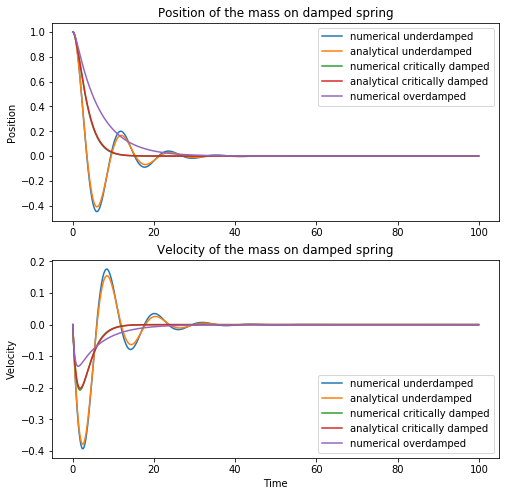

In [19]:
# Use Euler method to solve coupled first order ODE
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt



# Initial conditions
x_0 = 1.0
v_0 = 0.0

# Number of timesteps
T = 1000
dt = 0.1 #size of time step (Delta t)

def Euler(t0, x0, v0, T, dt, cm, km):
    x_data = np.zeros(T)
    v_data = np.zeros(T)
    
    t_data = np.arange(T) * dt + t0
    x_data[0] = x0
    v_data[0] = v0
    
    
    for i in range(1,T):
        x_data[i] = x_data[i-1] + v_data[i-1] * dt
        v_data[i] = v_data[i-1] + (-cm * v_data[i - 1] - km * x_data[i-1]) * dt
        
    return t_data, x_data, v_data


km = 0.3 # value of k / m
cms = [.3, 1.095] # values of c/m
labels = ['underdamped', 'critically damped']

plt.figure(figsize=(8,8))
x_0 = 1.0

plt.subplot(211)
plt.ylabel("Position")

plt.title("Position of the mass on damped spring")

plt.subplot(212)
plt.ylabel("Velocity")
plt.xlabel("Time")

plt.title("Velocity of the mass on damped spring")

for i, cm in enumerate(cms):
    
# Analytical solutions for (x(t), v(t)) assuming x_0 = 1.0, v_0 = 0, t_0 = 0
    D = x_0/np.sqrt(1 - cm**2/(4*km))
    y = cm/2
    w = (km - 1/4 * cm**2)**(1/2)
    phi = np.arctan2(-y, w)

    t_data, x_data, v_data = Euler(0.0, x_0, v_0, T, dt, cm, km)
    analytical_x = D * np.exp(-y * t_data) * np.cos(w*t_data + phi)
    analytical_v = -y * D * np.exp(-y * t_data) * np.cos(w*t_data + phi) \
    - w * D * np.exp(-y*t_data) * np.sin(w*t_data + phi)

    plt.subplot(211)
    plt.plot(t_data, x_data, label="numerical " + labels[i])
    plt.plot(t_data, analytical_x,label="analytical " + labels[i])
    plt.legend()
    
    plt.subplot(212)
    plt.plot(t_data, v_data, label="numerical " + labels[i])
    plt.plot(t_data, analytical_v, label="analytical " + labels[i])
    plt.legend()

    
overdamped_cm = 2
t_data, x_data, v_data = Euler(0.0, x_0, v_0, T, dt, overdamped_cm, km)
plt.subplot(211)
plt.plot(t_data, x_data, label="numerical overdamped")
plt.legend()

plt.subplot(212)
plt.plot(t_data, v_data, label="numerical overdamped")
plt.legend()


The ratio $\frac{cm^2}{km}$ determines whether the oscillator is underdamped, critically damped, or overdamped

## But wait...

But you know that for a closed system, like the SHO, we actually have a special constraint on the system--the total energy (kinetic + potential) must be constant! So at every point of our solution, we should check whether this is true. How do we evaluate the total energy?

$$E = T + U = \frac{1}{2}mv^2 + \frac{1}{2}kx^2$$

Let's define a rescaled energy $\tilde{E}$ as $(1/m)E$:

$$\tilde{E} = \frac{1}{2}v^2 + \frac{1}{2}\frac{k}{m} x^2$$

### Exercise 2:

1. Copy the code from the example using the SHO above, in which we solved the SHO using the Euler Method. Add code to calculate the rescaled energy $\tilde{E}_i$ for each time step.
1. Plot $\tilde{E}(t)$ vs. the time. Does the energy stay constant, fluctuate around some constant value, or does it diverge/decay?

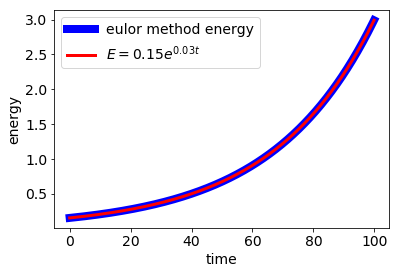

In [62]:
# Use Euler method to solve coupled first order ODE
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.optimize as sp
plt.rcParams['font.size'] = 14


km = 0.3 # value of k / m

# Initial conditions
x_0 = 1.0
v_0 = 0.0

# Number of timesteps
T = 1000
dt = 0.1 #size of time step (Delta t)


def Euler(t0, x0, v0, T, dt):
    x_data = np.zeros(T)
    v_data = np.zeros(T)
    E_data = np.zeros(T)
    
    t_data = np.arange(T) * dt + t0
    x_data[0] = x0
    v_data[0] = v0
    E_data[0] = 1/2 * v0**2 + 1/2 * km * x0**2
    
    for i in range(1,T):
        x_data[i] = x_data[i-1] + v_data[i-1] * dt
        v_data[i] = v_data[i-1] + (-km * x_data[i-1]) * dt
        E_data[i] = 1/2 * v_data[i]**2 + 1/2 * km * x_data[i]**2
        
        
    return t_data, x_data, v_data, E_data

t_data, x_data, v_data, E_data = Euler(0.0, x_0, v_0, T, dt)

def linear(x, a, b):
    return a * x + b

par, _ = sp.curve_fit(linear, t_data, np.log(E_data))

plt.plot(t_data, E_data, 'b', linewidth = 8, label = 'eulor method energy')
plt.plot(t_data, np.exp(linear(t_data, *par)), 'r', linewidth = 3, label = '$E = {:.2f}e^{{{:.2f}t}}$'.format(np.exp(par[1]),par[0]))
plt.xlabel('time')
plt.ylabel('energy')
plt.legend()

* the Euler method yields an exponentially increasing energy

## Euler-Cromer/Symplectic Euler Method

There exists a way to keep the energy fluctuations from growing, using a just a slight variant of the update rules described above. This update rule is called the 

\begin{align}
v_i &= v_{i-1} + \left(-\frac{k}{m}x_{i-1}\right)\Delta t \\
x_i &= x_{i-1} + v_{i} \Delta t
\end{align}

In this version, you use the approximate velocity at time $t_i$ instead of the velocity at time $t_{i-1}$ to calculate $x_i$.

### Exercise 3:

1. Modify the code from Exercise 2 to instead implement the update rule in the Euler-Cromer method. You can either modify the it in-place or copy it to the cell below and modify it.
1. Now run your code to calculate and plot $x(t)$, $v(t)$, and $\tilde{E}(t)$. Does the energy stay constant, fluctuate around some constant value, or does it diverge/decay?

Amplitude = 0.004
Maximum fractional error error = 0.03


Text(0, 0.5, 'energy')

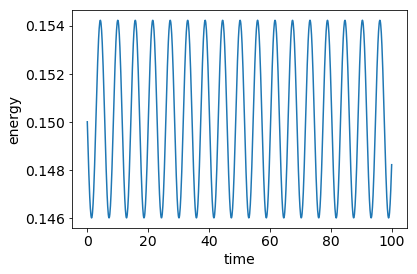

In [59]:
# Use Euler method to solve coupled first order ODE
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

km = 0.3 # value of k / m

# Initial conditions
x_0 = 1.0
v_0 = 0.0

# Number of timesteps
T = 1000
dt = 0.1 #size of time step (Delta t)


def Euler(t0, x0, v0, T, dt):
    x_data = np.zeros(T)
    v_data = np.zeros(T)
    E_data = np.zeros(T)
    
    t_data = np.arange(T) * dt + t0
    x_data[0] = x0
    v_data[0] = v0
    E_data[0] = 1/2 * v0**2 + 1/2 * km * x0**2
    
    for i in range(1,T):
        v_data[i] = v_data[i-1] + (-km * x_data[i-1]) * dt
        x_data[i] = x_data[i-1] + v_data[i] * dt
        E_data[i] = 1/2 * v_data[i]**2 + 1/2 * km * x_data[i]**2
        
        
    return t_data, x_data, v_data, E_data

t_data, x_data, v_data, E_data = Euler(0.0, x_0, v_0, T, dt)
print('Amplitude = {:.3f}'.format((np.max(E_data) - E_data[0])))
print('Maximum fractional error error = {:.2f}'.format((np.max(E_data) - E_data[0])/E_data[0]))
plt.plot(t_data, E_data)
plt.xlabel('time')
plt.ylabel('energy')

* the energy oscillates about an equilibrium value of .15 with an amplitude of .004
* the maximum fractional error in the energy is .03